In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
dataset_path = "BrainMRI"

In [9]:
print("Tumor images:", len(os.listdir(os.path.join(dataset_path, "yes"))))
print("No Tumor images:", len(os.listdir(os.path.join(dataset_path, "no"))))

Tumor images: 155
No Tumor images: 98


In [10]:
image_size = 64 
data = []
labels = []

for category in ['yes', 'no']:
    folder_path = os.path.join(dataset_path, category)
    class_label = 1 if category == 'yes' else 0  
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        try:
            
            img = cv2.imread(img_path)
           
            img = cv2.resize(img, (image_size, image_size))
           
            data.append(img)
            labels.append(class_label)
        except Exception as e:
            pass  

In [11]:
data = np.array(data) / 255.0  
labels = np.array(labels)

print("Shape of image data:", data.shape)
print("Shape of labels:", labels.shape)

Shape of image data: (253, 64, 64, 3)
Shape of labels: (253,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (202, 64, 64, 3)
Testing set: (51, 64, 64, 3)


In [13]:
# Create CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Dense Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # To avoid overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,337 (3.14 MB)

 Trainable params: 822,337 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=20)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.6270 - loss: 0.6747 - val_accuracy: 0.8095 - val_loss: 0.4976
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7865 - loss: 0.5003 - val_accuracy: 0.5714 - val_loss: 0.7095
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7339 - loss: 0.6171 - val_accuracy: 0.8095 - val_loss: 0.4723
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7873 - loss: 0.4884 - val_accuracy: 0.8095 - val_loss: 0.4656
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7762 - loss: 0.4507 - val_accuracy: 0.9048 - val_loss: 0.4122
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7875 - loss: 0.4212 - val_accuracy: 0.9048 - val_loss: 0.4355
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8438 - loss: 0.3715 - val_accuracy: 0.9048 - val_loss: 0.4073
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8192 - loss: 0.4077 - val_accuracy: 0.9048 - v

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7937 - loss: 0.5206

Test Accuracy: 78.43%


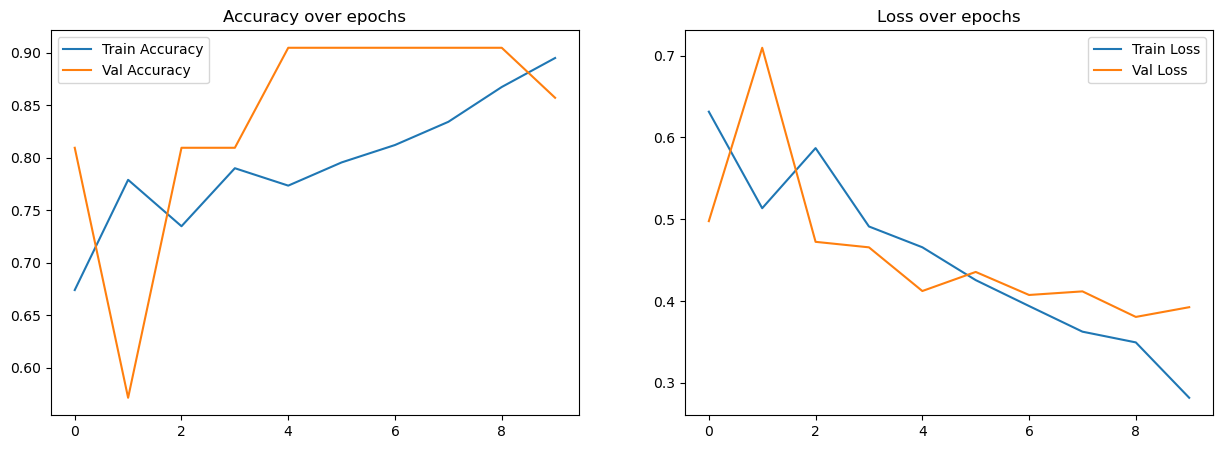

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over epochs")

plt.show()

In [ ]:
# AlexNet model

In [27]:
import tensorflow as tf

X_train_resized = tf.image.resize(X_train, (224,224)).numpy()
X_test_resized  = tf.image.resize(X_test, (224,224)).numpy()

In [30]:
alexnet = Sequential()

alexnet.add(Conv2D(96, (7, 7), strides=(2, 2), activation='relu', input_shape=X_train.shape[1:]))
alexnet.add(MaxPooling2D((2, 2)))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((2, 2)))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
alexnet.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
alexnet.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((2, 2)))

alexnet.add(Flatten())
alexnet.add(Dense(1024, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(512, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(1, activation='sigmoid'))

alexnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
alexnet.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 29, 29, 96)     │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │     2,360,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,613,505 (25.23 MB)

 Trainable params: 6,612,801 (25.23 MB)

 Non-trainable params: 704 (2.75 KB)

In [31]:
history_alex = alexnet.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=16
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.5492 - loss: 1.8202 - val_accuracy: 0.7143 - val_loss: 0.6455
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.6977 - loss: 0.6830 - val_accuracy: 0.7143 - val_loss: 0.6398
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.6673 - loss: 0.6079 - val_accuracy: 0.7619 - val_loss: 0.6350
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 0.7337 - loss: 0.5662 - val_accuracy: 0.7143 - val_loss: 0.5871
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.7982 - loss: 0.4311 - val_accuracy: 0.7143 - val_loss: 0.6368
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.7954 - loss: 0.5757 - val_accuracy: 0.7143 - val_loss: 0.6121
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7775 - loss: 0.4868 - val_accuracy: 0.7143 - val_loss: 0.5961
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.8329 - loss: 0.4562 - val_accuracy: 0.

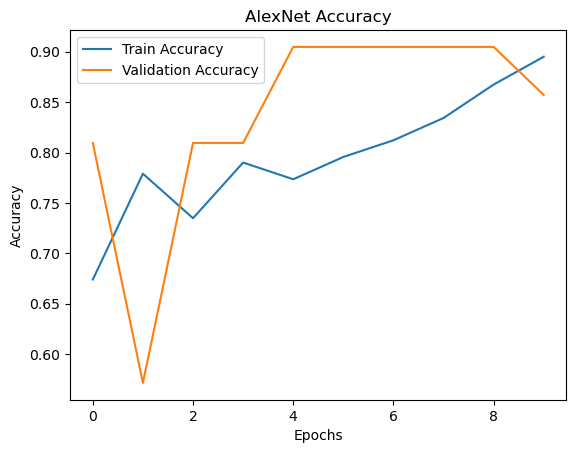

✅ Final Validation Accuracy: 85.71%


In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("AlexNet Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Print final accuracy
final_acc = history.history['val_accuracy'][-1]
print(f"✅ Final Validation Accuracy: {final_acc*100:.2f}%")

In [ ]:
#VGG Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

vgg = Sequential()

vgg.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
vgg.add(Conv2D(64, (3,3), activation='relu', padding='same'))
vgg.add(MaxPooling2D((2,2)))

vgg.add(Conv2D(128, (3,3), activation='relu', padding='same'))
vgg.add(Conv2D(128, (3,3), activation='relu', padding='same'))
vgg.add(MaxPooling2D((2,2)))

vgg.add(Conv2D(256, (3,3), activation='relu', padding='same'))
vgg.add(Conv2D(256, (3,3), activation='relu', padding='same'))
vgg.add(MaxPooling2D((2,2)))

vgg.add(Flatten())
vgg.add(Dense(512, activation='relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(1, activation='sigmoid'))  

vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

vgg.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,535,041 (36.37 MB)

 Trainable params: 9,535,041 (36.37 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history3 = vgg.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=16)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.5762 - loss: 0.9183 - val_accuracy: 0.7143 - val_loss: 0.5870
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step - accuracy: 0.6515 - loss: 0.5961 - val_accuracy: 0.6667 - val_loss: 0.5870
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 517ms/step - accuracy: 0.7549 - loss: 0.5813 - val_accuracy: 0.6667 - val_loss: 0.4926
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 427ms/step - accuracy: 0.7587 - loss: 0.5084 - val_accuracy: 0.7143 - val_loss: 0.5015
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step - accuracy: 0.7910 - loss: 0.5344 - val_accuracy: 0.7619 - val_loss: 0.4758
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 449ms/step - accuracy: 0.7867 - loss: 0.4290 - val_accuracy: 0.7143 - val_loss: 0.5225
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 408ms/step - accuracy: 0.7804 - loss: 0.4676 - val_accuracy: 0.8095 - val_loss: 0.4602
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - accuracy: 0.7413 - loss: 0.5204 - val_accuracy: 0

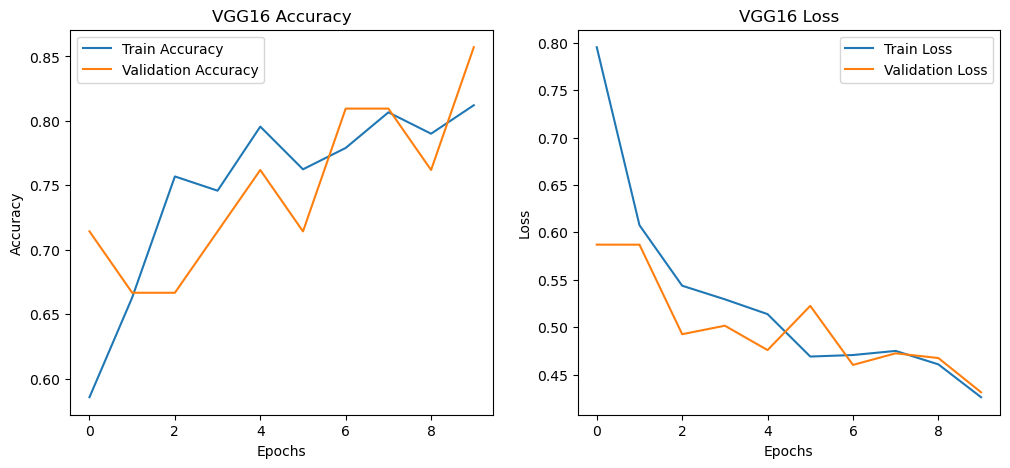

In [35]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title("VGG16 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title("VGG16 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [37]:
test_loss, test_acc = vgg.evaluate(X_test, y_test, verbose=0)
print(f"✅ VGG Test Accuracy: {test_acc*100:.2f}%")

✅ VGG Test Accuracy: 76.47%


In [ ]:
#AlexNet (85.71%) > CNN (78.43%) > VGG (76.47%) 

In [ ]:
#1. AlexNet

#✅ Accuracy: 85.71%

#Strengths: Strong feature extraction, works well on real-world images, reliable performance.

#Limitations: Heavy model, requires more resources compared to simple CNNs.

#2. CNN (Custom)

#✅ Accuracy: 78.43%

#Strengths: Lightweight, faster to train, good for small and medium-scale image tasks.

#Limitations: Struggles with complex image features, not as powerful as deeper models.

#3. VGG

#✅ Accuracy: 76.47%

#Strengths: Deep network, captures fine details, good theoretical performance.

#Limitations: Very slow, high memory requirement, less practical without strong hardware.

#Conclusion: AlexNet performs best here for real-world recognition, CNN is a good balance for smaller tasks, while VGG, though detailed, is less efficient.